In [1]:
!python -V

Python 3.10.13


In [11]:
!pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 25.9 MB/s eta 0:00:00:00:0100:01


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [5]:
import pickle

In [9]:
!wget -P '../data/' 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet'

--2024-05-14 16:09:37--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.38.147, 18.239.38.83, 18.239.38.181, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.239.38.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1333519 (1.3M) [binary/octet-stream]
Saving to: ‘./data/green_tripdata_2021-01.parquet’

green_tripdata_2021 100%[===================>]   1.27M  --.-KB/s    in 0.01s   

2024-05-14 16:09:37 (86.1 MB/s) - ‘./data/green_tripdata_2021-01.parquet’ saved [1333519/1333519]



In [24]:
!wget -P '../data/' 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet'

--2024-05-14 16:16:15--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.38.163, 18.239.38.83, 18.239.38.181, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.239.38.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1145679 (1.1M) [binary/octet-stream]
Saving to: ‘./data/green_tripdata_2021-02.parquet’

green_tripdata_2021 100%[===================>]   1.09M  --.-KB/s    in 0.01s   

2024-05-14 16:16:16 (87.5 MB/s) - ‘./data/green_tripdata_2021-02.parquet’ saved [1145679/1145679]



In [12]:
df = pd.read_parquet('../data/green_tripdata_2021-01.parquet')

df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

df['duration']=df.lpep_dropoff_datetime - df.lpep_pickup_datetime 

df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
df= df[((df.duration>=1) &(df.duration<=60))]

categorical=['PULocationID', 'DOLocationID']

df[categorical]=df[categorical].astype(str)

In [13]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.5,...,0.5,0.96,0.0,None,0.3,5.76,1.0,1.0,0.00,2.316667


In [12]:
df=df[df.trip_type ==2]

/home/mlops_zoomcamp/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

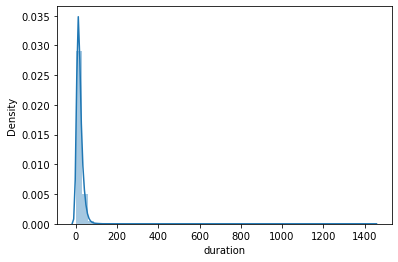

In [34]:
sns.distplot(df.duration)

In [35]:
df.duration.describe()

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
25%          8.000000
50%         13.883333
75%         23.000000
max       1439.600000
Name: duration, dtype: float64

In [14]:
df= df[((df.duration>=1) &(df.duration<=60))]

In [15]:
categorical=['PULocationID', 'DOLocationID']
numerical=['trip_distance']

In [16]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [19]:
df[categorical]=df[categorical].astype(str)

In [20]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [22]:
def read_df(filename):
    df = pd.read_parquet(filename)

    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

    df['duration']=df.lpep_dropoff_datetime - df.lpep_pickup_datetime 

    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
    df= df[((df.duration>=1) &(df.duration<=60))]

    categorical=['PULocationID', 'DOLocationID']

    df[categorical]=df[categorical].astype(str)
    return df

In [25]:
filename_train ='../data/green_tripdata_2021-01.parquet'
filename_val = '../data/green_tripdata_2021-02.parquet'
df_train = read_df(filename_train)
df_val = read_df(filename_val)

In [26]:
len(df_train), len(df_val)

(73908, 61921)

In [27]:
df_train['PU_DO'] = df_train['PULocationID']+'_'+df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID']+'_'+df_val['DOLocationID']


In [28]:
dv = DictVectorizer()

categorical= ['PU_DO'] #['PULocationID', 'DOLocationID']
numerical=['trip_distance']

train_dicts = df_train[categorical+numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [29]:
y_train = df_train['duration'].values
y_val = df_val['duration'].values

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.758715209663881

In [32]:
with open ('./models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv,lr), f_out)

In [33]:
la = Lasso(alpha = 0.001)
la.fit(X_train,y_train)

y_pred = la.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.233436225720547

In [45]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [46]:
y_train = df['duration'].values

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_6283/1019781846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label ='actual')
/tmp/ipykernel_6283/1019781846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label ='prediction')


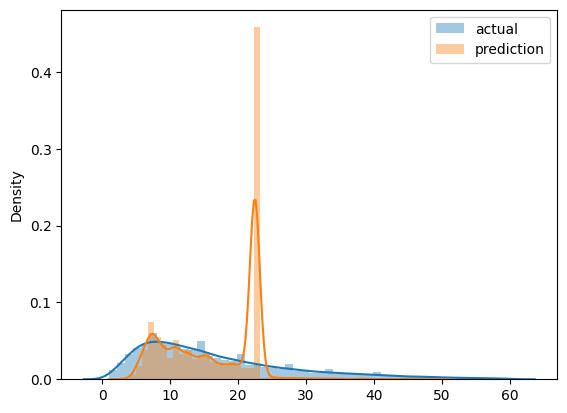

In [34]:
sns.distplot(y_train, label ='actual')
sns.distplot(y_pred, label ='prediction')
plt.legend()

In [35]:
mean_squared_error(y_train, y_pred, squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [73908, 61921]

In [ ]:
la = Lasso()
la.fit(X_train,y_train)
y_pred = la.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)